In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [10]:
fn = 'data_USA_wifi.csv'
data = np.genfromtxt(fn)
file_size = os.path.getsize(fn)
print data.shape
print file_size

(94448, 2)
2350339


In [11]:
data[-1,0] - data[0,0]

3696.006991147995

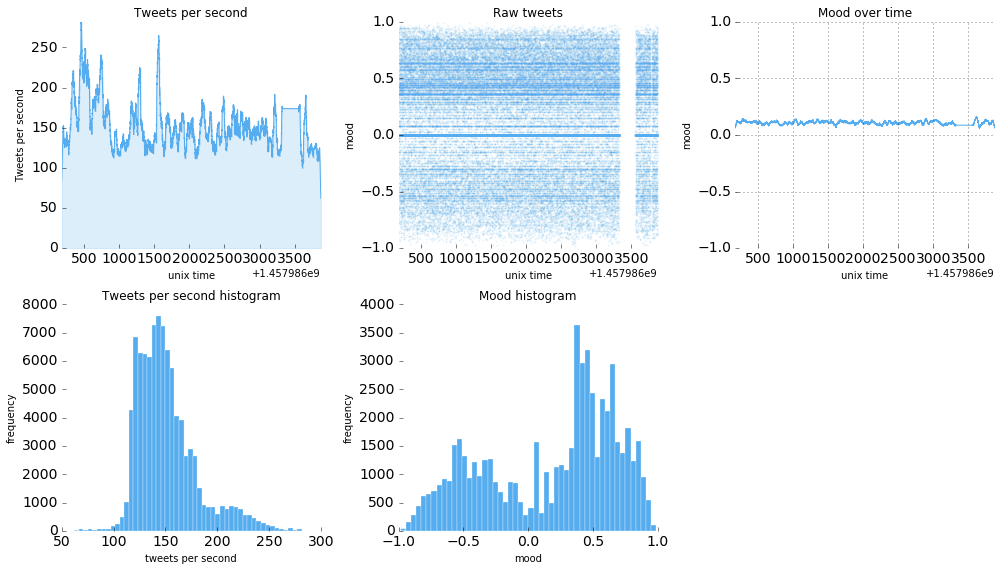

In [12]:
N = 1000
data_smooth = np.convolve(data[:,1], np.ones((N,))/N, mode='same')
N = 1000
tweets_per_second_smooth = np.convolve(1/np.diff(data[:,0]), np.ones((N,))/N, mode='same')

plt.figure(figsize=(14,8))

ax = plt.subplot(231)
ax.set_title('Tweets per second')
ax.plot(data[:-1,0], tweets_per_second_smooth, color='#55acee')
ax.fill_between(data[:-1,0], tweets_per_second_smooth, [0]*len(tweets_per_second_smooth), alpha=0.2, color='#55acee')
ax.set_ylabel('Tweets per second')
ax.set_xlabel('unix time')
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0, np.max(tweets_per_second_smooth)])
plt.xlim([data[0,0],data[-1,0]])

ax = plt.subplot(232)
plt.title('Raw tweets')
plt.scatter(data[:,0], data[:,1], s=1, color='#55acee', alpha=0.1)
plt.ylabel('mood')
plt.xlabel('unix time')
plt.ylim([-1, 1])
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([data[0,0],data[-1,0]])

ax = plt.subplot(233)
plt.title('Mood over time')
plt.plot(data[:,0], data_smooth, color='#55acee')
plt.ylabel('mood')
plt.xlabel('unix time')
plt.ylim([-1, 1])
plt.grid('on')
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([data[0,0],data[-1,0]])

ax = plt.subplot(234)
plt.title('Tweets per second histogram')
plt.hist(tweets_per_second_smooth, 50, edgecolor='w', linewidth=0.3, color='#55acee')
plt.ylabel('frequency')
plt.xlabel('tweets per second')
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.subplot(235)
plt.title('Mood histogram')
mood_nonzero = [mood for mood in data[:,1] if not mood == 0]
plt.hist(mood_nonzero, 50, edgecolor='w', linewidth=0.3, color='#55acee')
plt.ylabel('frequency')
plt.xlabel('mood')
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()